<a href="https://colab.research.google.com/github/Munhozs/poderada-m9-sem-07/blob/main/Lunar_Lander_Ponderada_Semana_7_M%C3%B3dulo_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install xvfb
!pip install gymnasium
!pip install swig
!pip install pygame
!pip install gymnasium[box2d]
!pip install pyvirtualdisplay
!pip install pyglet

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,081 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,641 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,357 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,107 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,920 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-upd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
from IPython.display import HTML
from gym.wrappers.monitoring.video_recorder import VideoRecorder
import io
import base64

def show_video():
    mp4list = list(filter(lambda x: x.endswith('.mp4'), os.listdir('.')))
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        return HTML(data='''<video alt="test" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii')))
    else:
        print("Vídeo salvo na pasta 'vídeo'.")

In [ ]:
import numpy as np
import gym

class DiscretizeObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env, bins):
        super().__init__(env)
        self.bins = bins

    def observation(self, observation):
        return tuple(np.digitize(observation[i], self.bins[i]) for i in range(len(observation)))

# Criar o ambiente Lunar Lander
env = gym.make("LunarLander-v2", render_mode="rgb_array")

# Definir os bins para discretização
bins = [np.linspace(env.observation_space.low[i], env.observation_space.high[i], 10) for i in range(env.observation_space.shape[0])]

# Aplicar a discretização usando a função personalizada
env = DiscretizeObservationWrapper(env, bins)

# Agora podemos usar este ambiente para aplicar o algoritmo Q-learning


In [ ]:
import numpy as np
import os

from gym.wrappers.monitoring import video_recorder

vid_recorder = video_recorder.VideoRecorder(env, path="./video/lunar-lander.mp4")

# Lista para armazenar as recompensas de cada episódio
episode_rewards = []

# Parâmetros
alpha = 0.1  # taxa de aprendizagem
gamma = 0.99  # fator de desconto
epsilon = 0.05  # probabilidade de exploração

# Inicialização da tabela Q
num_states = 10 ** env.observation_space.shape[0]  # Número total de estados discretos
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Função para discretizar um estado
def discretize_state(state):
    discrete_state = 0
    for i, s in enumerate(state):
        discrete_state += min(s, 9) * (10 ** i)  # Limitando o valor máximo para 9
    return discrete_state

# Função para escolher a ação usando a política epsilon-greedy
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # ação aleatória
    else:
        return np.argmax(Q[state, :])  # ação com maior valor Q

# Loop de episódios
for episode in range(4000):
    observation = env.reset(seed=42)  # Apenas atribuir a observação inicial a uma variável
    state = discretize_state(observation)
    total_reward = 0
    steps = 0


    # Loop de passos no episódio
    while True:
        action = choose_action(state)  # Ação escolhida baseada no estado atual
        next_observation, reward, terminated, info = env.step(action)
        next_state = discretize_state(next_observation)
        total_reward += reward
        steps += 1

        # Atualizar o valor Q
        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state, :]) - Q[state, action]
        )

        state = next_state

        if terminated:
            break

        if "TimeLimit.truncated" in info and info["TimeLimit.truncated"]:
            print("Episode terminated due to truncation.")
            break

        # Verificar se o número máximo de passos foi atingido
        if steps >= env.spec.max_episode_steps:
            print("Maximum number of steps reached.")
            break

        if (episode == 0 or episode == 99 or episode == 199  or episode == 999 or episode == 1499 or episode == 1999 or episode == 2499 or episode == 2999 or episode == 3499 or episode == 3999):
            vid_recorder.capture_frame()

    # Armazenar a recompensa do episódio atual
    episode_rewards.append(total_reward)

    print(f"Episode {episode + 1}, Total Reward: {total_reward}")

vid_recorder.close()
env.close()
show_video()

Episode 1, Total Reward: -218.7790565436933
Episode 2, Total Reward: -272.77596264419856
Episode 3, Total Reward: -148.44399836371946
Episode 4, Total Reward: -8.549166349344532
Episode 5, Total Reward: -229.4611425810478
Episode 6, Total Reward: -222.24080379249406
Episode 7, Total Reward: -175.59176144314551
Episode 8, Total Reward: -204.1631025889999
Episode 9, Total Reward: -22.02789153588246
Episode 10, Total Reward: -3.2440183244183203
Episode 11, Total Reward: -387.4712599834298
Episode 12, Total Reward: -136.81129591541895
Episode 13, Total Reward: -165.1571392987584
Episode 14, Total Reward: -125.2835642378616
Episode 15, Total Reward: -184.28715087253642
Episode 16, Total Reward: -149.2676804564469
Episode 17, Total Reward: -82.06787349541237
Episode 18, Total Reward: -132.31038350643615
Episode 19, Total Reward: -218.13520652956015
Episode 20, Total Reward: -131.32713633717646
Episode 21, Total Reward: -128.56465968466966
Episode 22, Total Reward: -104.77902223133658
Episode

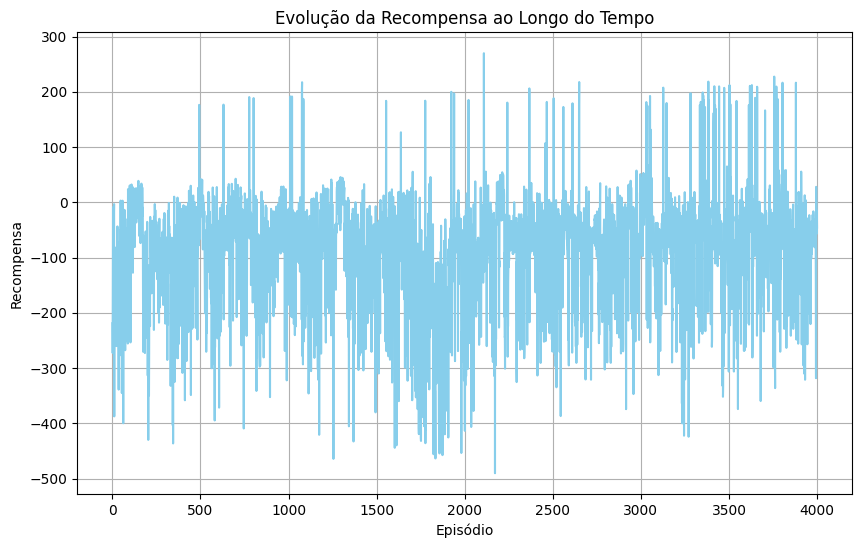

In [ ]:
import matplotlib.pyplot as plt


# Plotar o gráfico de linha da evolução da recompensa ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(episode_rewards) + 1), episode_rewards, color='skyblue')
plt.title('Evolução da Recompensa ao Longo do Tempo')
plt.xlabel('Episódio')
plt.ylabel('Recompensa')
plt.grid(True)
plt.show()

A partir dos dados acima sobre a distribuição de recompensa ao longo dos episódios, pode-se concluir que o agente não foi capaz de encontar uma política ideal que possibilite o pouso da nave com sucesso, uma vez que os valores predominantemente foram negativos e não houve uma progressão que melhorasse os valores. Entretanto, cabe ressaltar que a amostra foi colhida ao longo de 30 minutos e que nos episódios finais há mais ocorrências de valores próximos à 200 do que no restante do treinamento, então há a possibilidade do modelo convergir com mais episódios.